In [330]:
from cloudmesh.common.Shell import Shell
from cloudmesh.common.util import readfile, writefile

import matplotlib.pyplot as plt
from matplotlib import rc

import pandas as pd
import seaborn as sns
from pprint import pprint

font = {'family': 'Arial',
        'weight' : 'normal',
        'size'   : 12}

rc('font', **font)

In [331]:
verbose = False

dict_of_log = {}

epochs = ["2","30","70","90"]
#epochs = ['2','5','12','13','14','15','16','17']
repeats = ["1","2","3","4","5"]
predictions = ['Next Magnitude 2 weeks Now',
               'Next Mag 3 Months Back',
               'Next Mag 6 Months Back',
               'Next Mag Year Back',
               'Magnitude 2 weeks Now 2wk+7',
               'Mag 3 Months Back 2wk+7',
               'Mag 6 Months Back 2wk+7',
               'Mag Year Back 2wk+7',
               'Magnitude 2 weeks Now 2wk+13',
               'Mag 3 Months Back 2wk+13',
               'Mag 6 Months Back 2wk+13',
               'Mag Year Back 2wk+13',
               'Magnitude 2 weeks Now 2wk+26',
               'Mag 3 Months Back 2wk+26',
               'Mag 6 Months Back 2wk+26',
               'Mag Year Back 2wk+26']

predictionsnew = ['Next 2 weeks Now',
               'Next 3 Months Back',
               'Next 6 Months Back',
               'Next Year Back',
               '2 weeks Now 2wk+7',
               '3 Months Back 2wk+7',
               '6 Months Back 2wk+7',
               'Year Back 2wk+7',
               '2 weeks Now 2wk+13',
               '3 Months Back 2wk+13',
               '6 Months Back 2wk+13',
               'Year Back 2wk+13',
               '2 weeks Now 2wk+26',
               '3 Months Back 2wk+26',
               '6 Months Back 2wk+26',
               'Year Back 2wk+26']

predict = dict(zip(predictions, predictionsnew))

system = 'singularity'
# system = 'singularity'

for epoch in epochs:
    for repeat in repeats:
        # dict_of_log[f'{epoch},{repeat}'] = Shell.map_filename(
        #     f'../experiments/rivanna/localscratch/card_name_a100_gpu_count_1_cpu_num_6_mem_32GB' \
        #     f'_repeat_{repeat}_TFTTransformerepochs_{epoch}/cloudmesh_mllog.log').path
        dict_of_log[f'{epoch},{repeat}'] = Shell.map_filename(
                f'../experiments/rivanna/{system}/card_name_a100_gpu_count_1_cpu_num_6_mem_32GB' \
                f'_repeat_{repeat}_TFTTransformerepochs_{epoch}/cloudmesh_mllog.log').path

mynotebooks = {}

index_0 = 0
for key, value in dict_of_log.items():
    temp_readfile = readfile(value)
    # print(temp_readfile)
    if verbose:
        print(temp_readfile[:300])
    mynotebooks[key] = temp_readfile
    index_0 += 1

count_lines = 0
dict_of_lines = {}
for epoch in epochs:
    for repeat in repeats:
        for index, predictionname in enumerate(predictions):
            dict_of_lines[f'{epoch},{repeat},{predictionname}'] = {}

if verbose:
    print(mynotebooks['2,1,Mag Year Back 2wk+26'])

In [332]:

index = 0
for key, value in list(mynotebooks.items()):
    for line in value.splitlines():
        #line.replace('\\', '')
        if 'Average_NNSE' in line:
            # print(key)
            try:
                mllogdict = eval(line.split(':::MLLOG ')[-1])
                # pprint(mllogdict)
                predname = eval(mllogdict['value'])['Predictionname']
                dict_of_lines[f'{key},{predname}'] = eval(line.split(':::MLLOG')[-1])
                count_lines += 1
                if verbose:
                    print(line)
                index += 1
            except KeyError:
                print(f'run {key} is incomplete')
                continue


In [333]:
# print(dict_of_lines['90,2,Mag Year Back 2wk+7'])
# print(dict_of_lines['70,4,Mag Year Back 2wk+26'])

In [334]:
to_delete = []

for key, value in dict_of_lines.items():
    try:
        if type(dict_of_lines[key]['value']) != dict:
            dict_of_lines[key]['value'] = eval(dict_of_lines[key]['value'])
        for key2, value2 in dict_of_lines[key]['value'].items():
            dict_of_lines[key][key2] = value2
        dict_of_lines[key]['epoch'] = key.split(',')[0]
        dict_of_lines[key]['repeat'] = key.split(',')[1]
        dict_of_lines[key]['prediction_name'] = key.split(',')[-1]
    except TypeError as e:
        print(f'{key} failed. incomplete run.')
        to_delete.append(key)
        continue
    except KeyError as e:
        print(f'{key} failed. incomplete run.')
        to_delete.append(key)
        continue


for key in to_delete:
    del dict_of_lines[key]

if verbose:
    print(count_lines)

70,4,Next Magnitude 2 weeks Now failed. incomplete run.
70,4,Next Mag 3 Months Back failed. incomplete run.
70,4,Next Mag 6 Months Back failed. incomplete run.
70,4,Next Mag Year Back failed. incomplete run.
70,4,Magnitude 2 weeks Now 2wk+7 failed. incomplete run.
70,4,Mag 3 Months Back 2wk+7 failed. incomplete run.
70,4,Mag 6 Months Back 2wk+7 failed. incomplete run.
70,4,Mag Year Back 2wk+7 failed. incomplete run.
70,4,Magnitude 2 weeks Now 2wk+13 failed. incomplete run.
70,4,Mag 3 Months Back 2wk+13 failed. incomplete run.
70,4,Mag 6 Months Back 2wk+13 failed. incomplete run.
70,4,Mag Year Back 2wk+13 failed. incomplete run.
70,4,Magnitude 2 weeks Now 2wk+26 failed. incomplete run.
70,4,Mag 3 Months Back 2wk+26 failed. incomplete run.
70,4,Mag 6 Months Back 2wk+26 failed. incomplete run.
70,4,Mag Year Back 2wk+26 failed. incomplete run.
70,5,Next Magnitude 2 weeks Now failed. incomplete run.
70,5,Next Mag 3 Months Back failed. incomplete run.
70,5,Next Mag 6 Months Back failed. inco

In [335]:
df = pd.DataFrame(dict_of_lines).transpose()
# move columns to the front.
cols_to_move = ['epoch', 'repeat', 'Average_NNSE', 'Average_NNSE_train', 'Average_NNSE_val', 'Summed_NNSE', 'Summed_NNSE_train', 'Summed_NNSE_val', 'Predictionname']
df = df[ cols_to_move + [ col for col in df.columns if col not in cols_to_move ]]
df

,epoch,repeat,Average_NNSE,Average_NNSE_train,Average_NNSE_val,Summed_NNSE,Summed_NNSE_train,Summed_NNSE_val,Predictionname,namespace,...,value,metadata,result,name,line,label,NNSE_event_num,Future,PredictedQuantity,prediction_name
"2,1,Next Magnitude 2 weeks Now",2,1,0.478,0.477,0.481,0.364,0.348,0.432,Next Magnitude 2 weeks Now,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...",{'file': '/tmp/ipykernel_122446/2989231370.py'...,True,NNSE,,,0,False,0,Next Magnitude 2 weeks Now
"2,1,Next Mag 3 Months Back",2,1,0.561,0.561,0.564,0.543,0.539,0.559,Next Mag 3 Months Back,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...",{'file': '/tmp/ipykernel_122446/2989231370.py'...,True,NNSE,,,1,False,1,Next Mag 3 Months Back
"2,1,Next Mag 6 Months Back",2,1,0.595,0.595,0.596,0.64,0.637,0.646,Next Mag 6 Months Back,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...",{'file': '/tmp/ipykernel_122446/2989231370.py'...,True,NNSE,,,2,False,2,Next Mag 6 Months Back
"2,1,Next Mag Year Back",2,1,0.563,0.564,0.562,0.594,0.597,0.579,Next Mag Year Back,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...",{'file': '/tmp/ipykernel_122446/2989231370.py'...,True,NNSE,,,3,False,3,Next Mag Year Back
"2,1,Magnitude 2 weeks Now 2wk+7",2,1,0.503,0.503,0.507,0.524,0.512,0.557,Magnitude 2 weeks Now 2wk+7,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '[31...",{'file': '/tmp/ipykernel_122446/2989231370.py'...,True,NNSE,[31mFuture [0m,,4,True,24,Magnitude 2 weeks Now 2wk+7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"90,5,Mag Year Back 2wk+13",90,5,0.678,0.678,0.682,0.719,0.714,0.729,Mag Year Back 2wk+13,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '[31...",{'file': '/tmp/ipykernel_158340/2989231370.py'...,True,NNSE,[31mFuture [0m,,11,True,51,Mag Year Back 2wk+13
"90,5,Magnitude 2 weeks Now 2wk+26",90,5,0.5,0.499,0.505,0.488,0.465,0.563,Magnitude 2 weeks Now 2wk+26,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '[31...",{'file': '/tmp/ipykernel_158340/2989231370.py'...,True,NNSE,[31mFuture [0m,,12,True,100,Magnitude 2 weeks Now 2wk+26
"90,5,Mag 3 Months Back 2wk+26",90,5,0.512,0.51,0.52,0.605,0.592,0.634,Mag 3 Months Back 2wk+26,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '[31...",{'file': '/tmp/ipykernel_158340/2989231370.py'...,True,NNSE,[31mFuture [0m,,13,True,101,Mag 3 Months Back 2wk+26
"90,5,Mag 6 Months Back 2wk+26",90,5,0.507,0.505,0.514,0.547,0.539,0.567,Mag 6 Months Back 2wk+26,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '[31...",{'file': '/tmp/ipykernel_158340/2989231370.py'...,True,NNSE,[31mFuture [0m,,14,True,102,Mag 6 Months Back 2wk+26


In [336]:
#change predictionname values to convert magnitude to mag
df['Predictionname'] = df['Predictionname'].replace(predict)
display(df)
#this effort is foiled because of the correct_order thing that comes before

,epoch,repeat,Average_NNSE,Average_NNSE_train,Average_NNSE_val,Summed_NNSE,Summed_NNSE_train,Summed_NNSE_val,Predictionname,namespace,...,value,metadata,result,name,line,label,NNSE_event_num,Future,PredictedQuantity,prediction_name
"2,1,Next Magnitude 2 weeks Now",2,1,0.478,0.477,0.481,0.364,0.348,0.432,Next 2 weeks Now,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...",{'file': '/tmp/ipykernel_122446/2989231370.py'...,True,NNSE,,,0,False,0,Next Magnitude 2 weeks Now
"2,1,Next Mag 3 Months Back",2,1,0.561,0.561,0.564,0.543,0.539,0.559,Next 3 Months Back,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...",{'file': '/tmp/ipykernel_122446/2989231370.py'...,True,NNSE,,,1,False,1,Next Mag 3 Months Back
"2,1,Next Mag 6 Months Back",2,1,0.595,0.595,0.596,0.64,0.637,0.646,Next 6 Months Back,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...",{'file': '/tmp/ipykernel_122446/2989231370.py'...,True,NNSE,,,2,False,2,Next Mag 6 Months Back
"2,1,Next Mag Year Back",2,1,0.563,0.564,0.562,0.594,0.597,0.579,Next Year Back,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...",{'file': '/tmp/ipykernel_122446/2989231370.py'...,True,NNSE,,,3,False,3,Next Mag Year Back
"2,1,Magnitude 2 weeks Now 2wk+7",2,1,0.503,0.503,0.507,0.524,0.512,0.557,2 weeks Now 2wk+7,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '[31...",{'file': '/tmp/ipykernel_122446/2989231370.py'...,True,NNSE,[31mFuture [0m,,4,True,24,Magnitude 2 weeks Now 2wk+7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"90,5,Mag Year Back 2wk+13",90,5,0.678,0.678,0.682,0.719,0.714,0.729,Year Back 2wk+13,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '[31...",{'file': '/tmp/ipykernel_158340/2989231370.py'...,True,NNSE,[31mFuture [0m,,11,True,51,Mag Year Back 2wk+13
"90,5,Magnitude 2 weeks Now 2wk+26",90,5,0.5,0.499,0.505,0.488,0.465,0.563,2 weeks Now 2wk+26,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '[31...",{'file': '/tmp/ipykernel_158340/2989231370.py'...,True,NNSE,[31mFuture [0m,,12,True,100,Magnitude 2 weeks Now 2wk+26
"90,5,Mag 3 Months Back 2wk+26",90,5,0.512,0.51,0.52,0.605,0.592,0.634,3 Months Back 2wk+26,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '[31...",{'file': '/tmp/ipykernel_158340/2989231370.py'...,True,NNSE,[31mFuture [0m,,13,True,101,Mag 3 Months Back 2wk+26
"90,5,Mag 6 Months Back 2wk+26",90,5,0.507,0.505,0.514,0.547,0.539,0.567,6 Months Back 2wk+26,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '[31...",{'file': '/tmp/ipykernel_158340/2989231370.py'...,True,NNSE,[31mFuture [0m,,14,True,102,Mag 6 Months Back 2wk+26


In [337]:
dict_find_order = {}

for prediction in predictionsnew:
    subset = df[df['Predictionname'] == prediction]
    # display(subset)
    subset['Average_NNSE'] = subset['Average_NNSE'].astype(float)
    highestrow = subset.loc[subset['Average_NNSE'].idxmax()]
    # print(highestrow['Predictionname'])
    dict_find_order[highestrow['Predictionname']] = highestrow['Average_NNSE']

C:\Users\stapm\AppData\Local\Temp\ipykernel_27012\1498190684.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Average_NNSE'] = subset['Average_NNSE'].astype(float)


In [338]:

# Sort the dictionary based on values
sorted_dict = dict(sorted(dict_find_order.items(), key=lambda item: item[1]))
# Prin
current_order = sorted_dict.keys()
print(sorted_dict.values())


dict_values([0.505, 0.505, 0.511, 0.513, 0.514, 0.514, 0.524, 0.525, 0.528, 0.533, 0.676, 0.682, 0.798, 0.872, 0.911, 0.937])


In [339]:
df = df.sort_values('Average_NNSE', ascending=False)
display(df)

,epoch,repeat,Average_NNSE,Average_NNSE_train,Average_NNSE_val,Summed_NNSE,Summed_NNSE_train,Summed_NNSE_val,Predictionname,namespace,...,value,metadata,result,name,line,label,NNSE_event_num,Future,PredictedQuantity,prediction_name
"90,5,Next Mag Year Back",90,5,0.937,0.937,0.937,0.982,0.982,0.976,Next Year Back,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...",{'file': '/tmp/ipykernel_158340/2989231370.py'...,True,NNSE,,,3,False,3,Next Mag Year Back
"90,4,Next Mag Year Back",90,4,0.932,0.933,0.931,0.958,0.958,0.954,Next Year Back,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...",{'file': '/tmp/ipykernel_158360/2989231370.py'...,True,NNSE,,,3,False,3,Next Mag Year Back
"70,2,Next Mag Year Back",70,2,0.932,0.932,0.931,0.932,0.93,0.934,Next Year Back,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...","{'file': '/tmp/ipykernel_18480/2989231370.py',...",True,NNSE,,,3,False,3,Next Mag Year Back
"90,3,Next Mag Year Back",90,3,0.928,0.928,0.927,0.936,0.935,0.935,Next Year Back,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...",{'file': '/tmp/ipykernel_158352/2989231370.py'...,True,NNSE,,,3,False,3,Next Mag Year Back
"90,1,Next Mag Year Back",90,1,0.926,0.926,0.925,0.929,0.928,0.931,Next Year Back,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...",{'file': '/tmp/ipykernel_158381/2989231370.py'...,True,NNSE,,,3,False,3,Next Mag Year Back
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"30,4,Magnitude 2 weeks Now 2wk+26",30,4,0.485,0.484,0.49,0.323,0.306,0.402,2 weeks Now 2wk+26,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '[31...","{'file': '/tmp/ipykernel_18417/2989231370.py',...",True,NNSE,[31mFuture [0m,,12,True,100,Magnitude 2 weeks Now 2wk+26
"30,5,Magnitude 2 weeks Now 2wk+26",30,5,0.482,0.481,0.486,0.303,0.286,0.381,2 weeks Now 2wk+26,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '[31...",{'file': '/tmp/ipykernel_100332/2989231370.py'...,True,NNSE,[31mFuture [0m,,12,True,100,Magnitude 2 weeks Now 2wk+26
"70,1,Mag Year Back 2wk+26",70,1,0.48,0.478,0.485,0.326,0.321,0.348,Year Back 2wk+26,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '[31...","{'file': '/tmp/ipykernel_18429/2989231370.py',...",True,NNSE,[31mFuture [0m,,15,True,103,Mag Year Back 2wk+26
"2,1,Next Magnitude 2 weeks Now",2,1,0.478,0.477,0.481,0.364,0.348,0.432,Next 2 weeks Now,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...",{'file': '/tmp/ipykernel_122446/2989231370.py'...,True,NNSE,,,0,False,0,Next Magnitude 2 weeks Now


In [340]:
content = df[['Average_NNSE_train', 'Average_NNSE_val', 'epoch', 'Predictionname']].head(20)#.style.hide(axis="index").to_latex().splitlines()
#content.insert(2, '\\hline')
#content.insert(-1, '\\hline')
table_file = Shell.map_filename('./tables/leaderboard.tex').path
# content = content.replace("\\begin{tabular}{lrl}", "\\begin{tabular}{lrl}\n\hline")
# content = content.replace('\\\\', '\\\\\\hline', 1)
display(content)
trainsmall = df.sort_values('Summed_NNSE_train', ascending=False).head(20)
valsmall = df.sort_values('Summed_NNSE_val', ascending=False).head(20)

train = df.sort_values('Average_NNSE_train', ascending=False)
val = df.sort_values('Average_NNSE_val', ascending=False)
display(train)
display(val)

,Average_NNSE_train,Average_NNSE_val,epoch,Predictionname
"90,5,Next Mag Year Back",0.937,0.937,90,Next Year Back
"90,4,Next Mag Year Back",0.933,0.931,90,Next Year Back
"70,2,Next Mag Year Back",0.932,0.931,70,Next Year Back
"90,3,Next Mag Year Back",0.928,0.927,90,Next Year Back
"90,1,Next Mag Year Back",0.926,0.925,90,Next Year Back
"30,3,Next Mag Year Back",0.919,0.917,30,Next Year Back
"70,1,Next Mag Year Back",0.916,0.915,70,Next Year Back
"70,3,Next Mag Year Back",0.916,0.915,70,Next Year Back
"90,3,Next Mag 6 Months Back",0.911,0.913,90,Next 6 Months Back
"30,2,Next Mag Year Back",0.907,0.906,30,Next Year Back


,epoch,repeat,Average_NNSE,Average_NNSE_train,Average_NNSE_val,Summed_NNSE,Summed_NNSE_train,Summed_NNSE_val,Predictionname,namespace,...,value,metadata,result,name,line,label,NNSE_event_num,Future,PredictedQuantity,prediction_name
"90,5,Next Mag Year Back",90,5,0.937,0.937,0.937,0.982,0.982,0.976,Next Year Back,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...",{'file': '/tmp/ipykernel_158340/2989231370.py'...,True,NNSE,,,3,False,3,Next Mag Year Back
"90,4,Next Mag Year Back",90,4,0.932,0.933,0.931,0.958,0.958,0.954,Next Year Back,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...",{'file': '/tmp/ipykernel_158360/2989231370.py'...,True,NNSE,,,3,False,3,Next Mag Year Back
"70,2,Next Mag Year Back",70,2,0.932,0.932,0.931,0.932,0.93,0.934,Next Year Back,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...","{'file': '/tmp/ipykernel_18480/2989231370.py',...",True,NNSE,,,3,False,3,Next Mag Year Back
"90,3,Next Mag Year Back",90,3,0.928,0.928,0.927,0.936,0.935,0.935,Next Year Back,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...",{'file': '/tmp/ipykernel_158352/2989231370.py'...,True,NNSE,,,3,False,3,Next Mag Year Back
"90,1,Next Mag Year Back",90,1,0.926,0.926,0.925,0.929,0.928,0.931,Next Year Back,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...",{'file': '/tmp/ipykernel_158381/2989231370.py'...,True,NNSE,,,3,False,3,Next Mag Year Back
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"30,4,Magnitude 2 weeks Now 2wk+26",30,4,0.485,0.484,0.49,0.323,0.306,0.402,2 weeks Now 2wk+26,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '[31...","{'file': '/tmp/ipykernel_18417/2989231370.py',...",True,NNSE,[31mFuture [0m,,12,True,100,Magnitude 2 weeks Now 2wk+26
"30,5,Magnitude 2 weeks Now 2wk+26",30,5,0.482,0.481,0.486,0.303,0.286,0.381,2 weeks Now 2wk+26,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '[31...",{'file': '/tmp/ipykernel_100332/2989231370.py'...,True,NNSE,[31mFuture [0m,,12,True,100,Magnitude 2 weeks Now 2wk+26
"70,1,Mag Year Back 2wk+26",70,1,0.48,0.478,0.485,0.326,0.321,0.348,Year Back 2wk+26,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '[31...","{'file': '/tmp/ipykernel_18429/2989231370.py',...",True,NNSE,[31mFuture [0m,,15,True,103,Mag Year Back 2wk+26
"2,1,Next Magnitude 2 weeks Now",2,1,0.478,0.477,0.481,0.364,0.348,0.432,Next 2 weeks Now,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...",{'file': '/tmp/ipykernel_122446/2989231370.py'...,True,NNSE,,,0,False,0,Next Magnitude 2 weeks Now


,epoch,repeat,Average_NNSE,Average_NNSE_train,Average_NNSE_val,Summed_NNSE,Summed_NNSE_train,Summed_NNSE_val,Predictionname,namespace,...,value,metadata,result,name,line,label,NNSE_event_num,Future,PredictedQuantity,prediction_name
"90,5,Next Mag Year Back",90,5,0.937,0.937,0.937,0.982,0.982,0.976,Next Year Back,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...",{'file': '/tmp/ipykernel_158340/2989231370.py'...,True,NNSE,,,3,False,3,Next Mag Year Back
"70,2,Next Mag Year Back",70,2,0.932,0.932,0.931,0.932,0.93,0.934,Next Year Back,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...","{'file': '/tmp/ipykernel_18480/2989231370.py',...",True,NNSE,,,3,False,3,Next Mag Year Back
"90,4,Next Mag Year Back",90,4,0.932,0.933,0.931,0.958,0.958,0.954,Next Year Back,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...",{'file': '/tmp/ipykernel_158360/2989231370.py'...,True,NNSE,,,3,False,3,Next Mag Year Back
"90,3,Next Mag Year Back",90,3,0.928,0.928,0.927,0.936,0.935,0.935,Next Year Back,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...",{'file': '/tmp/ipykernel_158352/2989231370.py'...,True,NNSE,,,3,False,3,Next Mag Year Back
"90,1,Next Mag Year Back",90,1,0.926,0.926,0.925,0.929,0.928,0.931,Next Year Back,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...",{'file': '/tmp/ipykernel_158381/2989231370.py'...,True,NNSE,,,3,False,3,Next Mag Year Back
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"2,1,Mag Year Back 2wk+26",2,1,0.488,0.488,0.489,0.562,0.569,0.534,Year Back 2wk+26,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '[31...",{'file': '/tmp/ipykernel_122446/2989231370.py'...,True,NNSE,[31mFuture [0m,,15,True,103,Mag Year Back 2wk+26
"30,5,Magnitude 2 weeks Now 2wk+26",30,5,0.482,0.481,0.486,0.303,0.286,0.381,2 weeks Now 2wk+26,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '[31...",{'file': '/tmp/ipykernel_100332/2989231370.py'...,True,NNSE,[31mFuture [0m,,12,True,100,Magnitude 2 weeks Now 2wk+26
"70,1,Mag Year Back 2wk+26",70,1,0.48,0.478,0.485,0.326,0.321,0.348,Year Back 2wk+26,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '[31...","{'file': '/tmp/ipykernel_18429/2989231370.py',...",True,NNSE,[31mFuture [0m,,15,True,103,Mag Year Back 2wk+26
"2,1,Next Magnitude 2 weeks Now",2,1,0.478,0.477,0.481,0.364,0.348,0.432,Next 2 weeks Now,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...",{'file': '/tmp/ipykernel_122446/2989231370.py'...,True,NNSE,,,0,False,0,Next Magnitude 2 weeks Now


In [341]:
display(train)
display(val)

,epoch,repeat,Average_NNSE,Average_NNSE_train,Average_NNSE_val,Summed_NNSE,Summed_NNSE_train,Summed_NNSE_val,Predictionname,namespace,...,value,metadata,result,name,line,label,NNSE_event_num,Future,PredictedQuantity,prediction_name
"90,5,Next Mag Year Back",90,5,0.937,0.937,0.937,0.982,0.982,0.976,Next Year Back,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...",{'file': '/tmp/ipykernel_158340/2989231370.py'...,True,NNSE,,,3,False,3,Next Mag Year Back
"90,4,Next Mag Year Back",90,4,0.932,0.933,0.931,0.958,0.958,0.954,Next Year Back,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...",{'file': '/tmp/ipykernel_158360/2989231370.py'...,True,NNSE,,,3,False,3,Next Mag Year Back
"70,2,Next Mag Year Back",70,2,0.932,0.932,0.931,0.932,0.93,0.934,Next Year Back,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...","{'file': '/tmp/ipykernel_18480/2989231370.py',...",True,NNSE,,,3,False,3,Next Mag Year Back
"90,3,Next Mag Year Back",90,3,0.928,0.928,0.927,0.936,0.935,0.935,Next Year Back,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...",{'file': '/tmp/ipykernel_158352/2989231370.py'...,True,NNSE,,,3,False,3,Next Mag Year Back
"90,1,Next Mag Year Back",90,1,0.926,0.926,0.925,0.929,0.928,0.931,Next Year Back,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...",{'file': '/tmp/ipykernel_158381/2989231370.py'...,True,NNSE,,,3,False,3,Next Mag Year Back
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"30,4,Magnitude 2 weeks Now 2wk+26",30,4,0.485,0.484,0.49,0.323,0.306,0.402,2 weeks Now 2wk+26,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '[31...","{'file': '/tmp/ipykernel_18417/2989231370.py',...",True,NNSE,[31mFuture [0m,,12,True,100,Magnitude 2 weeks Now 2wk+26
"30,5,Magnitude 2 weeks Now 2wk+26",30,5,0.482,0.481,0.486,0.303,0.286,0.381,2 weeks Now 2wk+26,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '[31...",{'file': '/tmp/ipykernel_100332/2989231370.py'...,True,NNSE,[31mFuture [0m,,12,True,100,Magnitude 2 weeks Now 2wk+26
"70,1,Mag Year Back 2wk+26",70,1,0.48,0.478,0.485,0.326,0.321,0.348,Year Back 2wk+26,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '[31...","{'file': '/tmp/ipykernel_18429/2989231370.py',...",True,NNSE,[31mFuture [0m,,15,True,103,Mag Year Back 2wk+26
"2,1,Next Magnitude 2 weeks Now",2,1,0.478,0.477,0.481,0.364,0.348,0.432,Next 2 weeks Now,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...",{'file': '/tmp/ipykernel_122446/2989231370.py'...,True,NNSE,,,0,False,0,Next Magnitude 2 weeks Now


,epoch,repeat,Average_NNSE,Average_NNSE_train,Average_NNSE_val,Summed_NNSE,Summed_NNSE_train,Summed_NNSE_val,Predictionname,namespace,...,value,metadata,result,name,line,label,NNSE_event_num,Future,PredictedQuantity,prediction_name
"90,5,Next Mag Year Back",90,5,0.937,0.937,0.937,0.982,0.982,0.976,Next Year Back,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...",{'file': '/tmp/ipykernel_158340/2989231370.py'...,True,NNSE,,,3,False,3,Next Mag Year Back
"70,2,Next Mag Year Back",70,2,0.932,0.932,0.931,0.932,0.93,0.934,Next Year Back,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...","{'file': '/tmp/ipykernel_18480/2989231370.py',...",True,NNSE,,,3,False,3,Next Mag Year Back
"90,4,Next Mag Year Back",90,4,0.932,0.933,0.931,0.958,0.958,0.954,Next Year Back,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...",{'file': '/tmp/ipykernel_158360/2989231370.py'...,True,NNSE,,,3,False,3,Next Mag Year Back
"90,3,Next Mag Year Back",90,3,0.928,0.928,0.927,0.936,0.935,0.935,Next Year Back,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...",{'file': '/tmp/ipykernel_158352/2989231370.py'...,True,NNSE,,,3,False,3,Next Mag Year Back
"90,1,Next Mag Year Back",90,1,0.926,0.926,0.925,0.929,0.928,0.931,Next Year Back,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...",{'file': '/tmp/ipykernel_158381/2989231370.py'...,True,NNSE,,,3,False,3,Next Mag Year Back
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"2,1,Mag Year Back 2wk+26",2,1,0.488,0.488,0.489,0.562,0.569,0.534,Year Back 2wk+26,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '[31...",{'file': '/tmp/ipykernel_122446/2989231370.py'...,True,NNSE,[31mFuture [0m,,15,True,103,Mag Year Back 2wk+26
"30,5,Magnitude 2 weeks Now 2wk+26",30,5,0.482,0.481,0.486,0.303,0.286,0.381,2 weeks Now 2wk+26,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '[31...",{'file': '/tmp/ipykernel_100332/2989231370.py'...,True,NNSE,[31mFuture [0m,,12,True,100,Magnitude 2 weeks Now 2wk+26
"70,1,Mag Year Back 2wk+26",70,1,0.48,0.478,0.485,0.326,0.321,0.348,Year Back 2wk+26,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '[31...","{'file': '/tmp/ipykernel_18429/2989231370.py',...",True,NNSE,[31mFuture [0m,,15,True,103,Mag Year Back 2wk+26
"2,1,Next Magnitude 2 weeks Now",2,1,0.478,0.477,0.481,0.364,0.348,0.432,Next 2 weeks Now,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...",{'file': '/tmp/ipykernel_122446/2989231370.py'...,True,NNSE,,,0,False,0,Next Magnitude 2 weeks Now


C:\Users\stapm\AppData\Local\Temp\ipykernel_27012\3503200418.py:20: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  g = sns.lineplot(data=dataframe,


<Figure size 640x480 with 0 Axes>

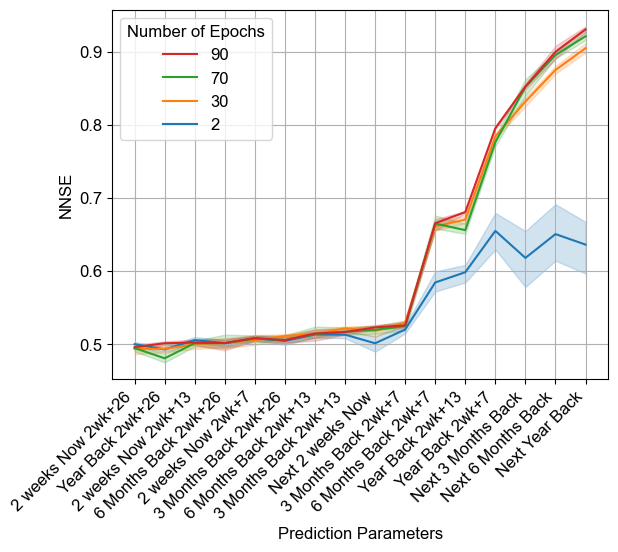

C:\Users\stapm\AppData\Local\Temp\ipykernel_27012\3503200418.py:20: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  g = sns.lineplot(data=dataframe,


<Figure size 640x480 with 0 Axes>

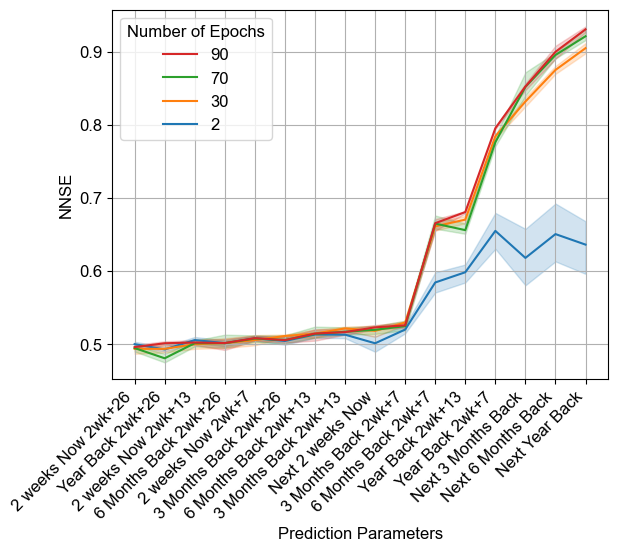

In [342]:
fancy_dict = {'training': train,
              'validation': val}

for name, dataframe in fancy_dict.items():
# for type_of_df, df in fancy_dict.items():
    plt.clf()
#     # df = mega_training_dataframe.pivot(index='name', columns='epoch', values='NNSE')
# # df.plot(figsize=(5,3))
#     current_order = parameter_order_validation
    fig, ax = plt.subplots()

    dataframe['predname_ordered'] = pd.Categorical(
            dataframe['Predictionname'],
            categories = current_order,
            ordered = True
    )
    dataframe = dataframe.sort_values('predname_ordered')

    palette = sns.color_palette("tab10")
    g = sns.lineplot(data=dataframe,
                 x="Predictionname",
                 y="Average_NNSE",
                 hue='epoch',
                 palette=palette,
                 hue_order=epochs)
    plt.grid()
    # sns.lineplot(data=min_max_df_dict[type_of_df],
        #              x="name_sorted",
        #              y="maximum",
        #              color='black',
        #              linestyle='dashed',
        #              linewidth='0.6')
        # sns.lineplot(data=min_max_df_dict[type_of_df],
        #              x="name_sorted",
        #              y="minimum",
        #              color='black',
        #              linestyle='dashed',
        #              linewidth='0.6')

    # for labels, dfi in mega_training_dataframe.groupby('epoch'):
    #     dfi.plot(ax = ax, x = 'name', y = 'NNSE', label = labels)

    # set the y range
    #plt.ylim(0.4, 1.0)

    ax.legend(title='Number of Epochs')
    handles, labels = ax.get_legend_handles_labels()
    #new_labels = [label[:-2] for label in labels]

    plt.legend(handles[::-1], labels[::-1], title='Number of Epochs')
    #plt.text(0.77, 0.41, "Dashed black lines represent\nminimum and maximum", horizontalalignment='left', size='medium', color='black')
    # plt.xticks(mega_training_dataframe['index'], mega_training_dataframe['name'])
    plt.setp(ax.xaxis.get_majorticklabels(), ha='right',
             weight='light')
    #sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel("Prediction Parameters")
    ax.set_ylabel("NNSE")
    # plt.title(type_of_df.capitalize() + ' on ' + name_of_gpu)
    image_file = Shell.map_filename(f'./images/NNSE-all-epochs-{name}.pdf').path
    plt.savefig(image_file, bbox_inches='tight')
    image_file = Shell.map_filename(f'./images/NNSE-all-epochs-{name}.png').path
    plt.savefig(image_file, bbox_inches='tight')
    #SAVEFIG(fig, f'./images/{name_of_gpu}-NNSE-all-epochs-{type_of_df}-min-max')
    plt.show()


,2,30,70,90
0,0.727,0.918,0.932,0.937
1,0.684,0.907,0.916,0.932
2,0.680,0.906,0.916,0.928
3,0.674,0.899,0.899,0.926
4,0.673,0.895,0.897,0.911
5,0.670,0.882,0.891,0.903
6,0.669,0.882,0.872,0.900
7,0.659,0.875,0.844,0.886
8,0.657,0.872,0.840,0.858
9,0.654,0.865,0.785,0.853


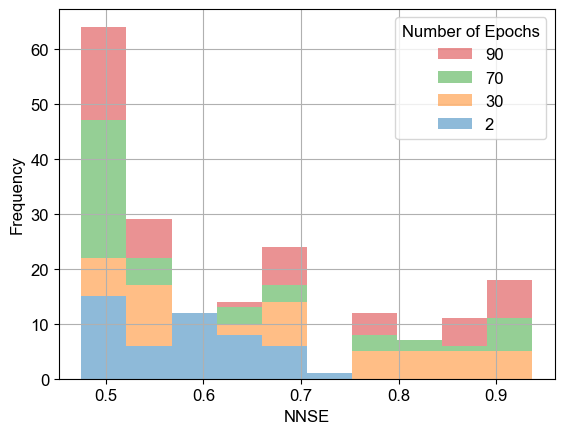

,2,30,70,90
0,0.727,0.918,0.932,0.937
1,0.684,0.907,0.916,0.932
2,0.680,0.906,0.916,0.928
3,0.674,0.899,0.899,0.926
4,0.673,0.895,0.897,0.911
5,0.670,0.882,0.891,0.903
6,0.669,0.882,0.872,0.900
7,0.659,0.875,0.844,0.886
8,0.657,0.872,0.840,0.858
9,0.654,0.865,0.785,0.853


<Figure size 640x480 with 0 Axes>

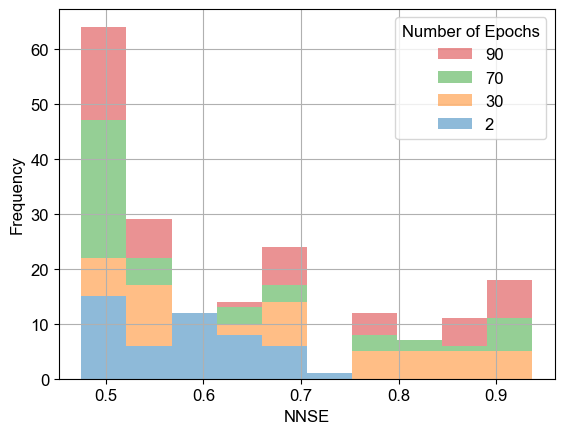

<Figure size 640x480 with 0 Axes>

In [343]:
def shorten_dictionary_lists(dictionary):
    # Find the minimum length among all lists in the dictionary
    min_length = min(len(lst) for lst in dictionary.values())

    # Create a new dictionary with shortened lists
    new_dictionary = {}
    for key, lst in dictionary.items():
        new_dictionary[key] = lst[:min_length]

    return new_dictionary

for name, dataframe in fancy_dict.items():

    stacked_dict = {}

    frequency_NNSE = dataframe['Average_NNSE']
    for epoch in epochs:
        freqnnse = dataframe.loc[dataframe['epoch'] == epoch]
        freqnnse = freqnnse['Average_NNSE']
        stacked_dict[epoch] = list(freqnnse.values)
    stacked_dict = shorten_dictionary_lists(stacked_dict)
    # pprint(stacked_dict)
    stacked_df = pd.DataFrame.from_dict(stacked_dict)
    display(stacked_df)
    #display(stacked_df)

    # for epoch in epochs:
    # pprint(stacked_dict)
    frequency_NNSE.rename("All Epochs", inplace=True)
    #frequency_NNSE.hist(stacked_df, legend=True, alpha=0.5, stacked=True)
    #ax.legend(title = 'Number of Epochs')

    ax = stacked_df.plot.hist(alpha=0.5, stacked=True, grid=True)
    handles, labels = ax.get_legend_handles_labels()

    ax.legend(reversed(handles), reversed(labels), title='Number of Epochs')

    plt.ylabel('Frequency')
    plt.xlabel('NNSE')
    plt.show()
    plt.savefig(f'./images/frequency_nnse_histogram_stacked_df_{name}.pdf', bbox_inches='tight')
    #SAVEFIG(plt, f'./images/frequency_nnse_histogram_stacked_df')

    #plt.clf()
    #plt.legend()


# Create tex table

In [344]:
def join_with_commas(sequence):
    if not sequence:
        return ''
    if len(sequence) == 1:
        return sequence[0]
    return '{} and {}'.format(', '.join(sequence[:-1]), sequence[-1])

In [345]:
display(trainsmall.sort_values('Average_NNSE_train', ascending=False))

,epoch,repeat,Average_NNSE,Average_NNSE_train,Average_NNSE_val,Summed_NNSE,Summed_NNSE_train,Summed_NNSE_val,Predictionname,namespace,...,value,metadata,result,name,line,label,NNSE_event_num,Future,PredictedQuantity,prediction_name
"90,5,Next Mag Year Back",90,5,0.937,0.937,0.937,0.982,0.982,0.976,Next Year Back,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...",{'file': '/tmp/ipykernel_158340/2989231370.py'...,True,NNSE,,,3,False,3,Next Mag Year Back
"90,4,Next Mag Year Back",90,4,0.932,0.933,0.931,0.958,0.958,0.954,Next Year Back,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...",{'file': '/tmp/ipykernel_158360/2989231370.py'...,True,NNSE,,,3,False,3,Next Mag Year Back
"30,3,Next Mag Year Back",30,3,0.918,0.919,0.917,0.984,0.984,0.975,Next Year Back,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...","{'file': '/tmp/ipykernel_18508/2989231370.py',...",True,NNSE,,,3,False,3,Next Mag Year Back
"90,3,Next Mag 6 Months Back",90,3,0.911,0.911,0.913,0.991,0.99,0.983,Next 6 Months Back,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...",{'file': '/tmp/ipykernel_158352/2989231370.py'...,True,NNSE,,,2,False,2,Next Mag 6 Months Back
"30,4,Next Mag Year Back",30,4,0.906,0.906,0.904,0.978,0.977,0.97,Next Year Back,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...","{'file': '/tmp/ipykernel_18417/2989231370.py',...",True,NNSE,,,3,False,3,Next Mag Year Back
"90,1,Next Mag 6 Months Back",90,1,0.903,0.902,0.904,0.989,0.988,0.98,Next 6 Months Back,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...",{'file': '/tmp/ipykernel_158381/2989231370.py'...,True,NNSE,,,2,False,2,Next Mag 6 Months Back
"30,3,Next Mag 6 Months Back",30,3,0.882,0.882,0.882,0.982,0.981,0.973,Next 6 Months Back,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...","{'file': '/tmp/ipykernel_18508/2989231370.py',...",True,NNSE,,,2,False,2,Next Mag 6 Months Back
"30,4,Next Mag 6 Months Back",30,4,0.875,0.875,0.877,0.985,0.985,0.974,Next 6 Months Back,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...","{'file': '/tmp/ipykernel_18417/2989231370.py',...",True,NNSE,,,2,False,2,Next Mag 6 Months Back
"70,1,Next Mag 3 Months Back",70,1,0.872,0.872,0.874,0.972,0.971,0.965,Next 3 Months Back,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...","{'file': '/tmp/ipykernel_18429/2989231370.py',...",True,NNSE,,,1,False,1,Next Mag 3 Months Back
"90,1,Next Mag 3 Months Back",90,1,0.858,0.857,0.861,0.968,0.967,0.962,Next 3 Months Back,cloudmesh,...,"{'result': True, 'name': 'NNSE', 'line': '', '...",{'file': '/tmp/ipykernel_158381/2989231370.py'...,True,NNSE,,,1,False,1,Next Mag 3 Months Back


In [346]:
table_string = fr'''
    \begin{{table}}[htb]
      \caption{{Ranking of the top 20 accuracy values.}}\
      \label{{tab:ranking-accuracy}}
    '''

for typennse in ['Average', 'Summed']:
    trainsmall = trainsmall.sort_values(f'{typennse}_NNSE_train', ascending=False)
    valsmall = valsmall.sort_values(f'{typennse}_NNSE_val', ascending=False)
    table_string += fr'''
        {{\bf (A)}} The top 20 {{\em {typennse.lower()}}} accuracy values based on hyperparameters with {join_with_commas(epochs)} epochs.\

      \renewcommand{{\arraystretch}}{{1.2}}
      \begin{{center}}
        {{\footnotesize
    \begin{{tabular}}{{|l||r|r|l|r|r|l|}}
      \hline
     &   \multicolumn{{3}}{{c|}}{{\bf \textcolor{{red}}{{Training}}}}  & \multicolumn{{3}}{{c|}}{{\bf \textcolor{{blue}}{{Validation}}}}  \\
    {{\bf Rank}} &  {{\bf NNSE}} &  {{\bf Epoch}} & {{\bf Prediction Parameter}} & {{\bf NNSE}} &  {{\bf Epoch}} & {{\bf Prediction Parameter}}\\
    \hline
    \hline
    '''

    # color_string = f'''\
    # \textcolor{{red}}{{1}}  &  \textcolor{{red}}{train.iloc[0]["Average_NNSE_train"]} &     \textcolor{{red}}{train.iloc[0]["epoch"]} &  \textcolor{{red}}{train.iloc[0]["Predictionname"]} &  \textcolor{{blue}}{val.iloc[0]["Average_NNSE_val"]} &     \textcolor{{blue}}{val.iloc[0]["epoch"]} &  \textcolor{{blue}}{val.iloc[0]["Predictionname"]} \\\\
    # '''
    color_string = '''\
    \\textcolor{{red}}{{1}}  &  \\textcolor{{red}}{} &     \\textcolor{{red}}{} &  \\textcolor{{red}}{} &  \\textcolor{{blue}}{} &     \\textcolor{{blue}}{} &  \\textcolor{{blue}}{} \\\\
    '''.format(
        "{" + str(trainsmall.iloc[0][f"{typennse}_NNSE_train"]) + "}",
        "{" + str(trainsmall.iloc[0]["epoch"]) + "}",
        "{" + str(trainsmall.iloc[0]["Predictionname"]) + "}",
        "{" + str(valsmall.iloc[0][f"{typennse}_NNSE_val"]) + "}",
        "{" + str(valsmall.iloc[0]["epoch"]) + "}",
        "{" + str(valsmall.iloc[0]["Predictionname"]) + "}"
    )


    # print(color_string)

    table_string += color_string
    # display(train)
    index = 0

    for trainrow, valrow, in zip(trainsmall.iterrows(), valsmall.iterrows()):
        train_num_of_spaces = 7 - (len(trainrow[1]["epoch"]))
        train_pred_name_spaces = 20 - (len(trainrow[1]["Predictionname"]))
        val_num_of_spaces = 7 - (len(valrow[1]["epoch"]))
        val_pred_name_spaces = 20 - (len(valrow[1]["Predictionname"]))
        index += 1
        if index == 1:
            continue
        # print(trainrow[1][f"{typennse}_NNSE_train"])
        # 2  &  0.6681 &     70 &  Now 2wk+26AVG &  0.5487 &     70 &  Now 2wk+26AVG \\
        table_string += fr'{index}  &  {trainrow[1][f"{typennse}_NNSE_train"]} &{" "*train_num_of_spaces}{trainrow[1]["epoch"]} &{" "*train_pred_name_spaces}{trainrow[1]["Predictionname"]} &  {valrow[1][f"{typennse}_NNSE_val"]} &{" "*val_num_of_spaces}{valrow[1]["epoch"]} &{" "*val_pred_name_spaces}{valrow[1]["Predictionname"]} \\' '\n'

    table_string += \
        f'''
        \hline
        \end{{tabular}}
        }}
        \end{{center}}
        '''
table_string += \
fr'''
        \end{{table}}
'''
print(table_string)
writefile(table_file, '\n'.join(content))


    \begin{table}[htb]
      \caption{Ranking of the top 20 accuracy values.}\
      \label{tab:ranking-accuracy}
    
        {\bf (A)} The top 20 {\em average} accuracy values based on hyperparameters with 2, 30, 70 and 90 epochs.\

      \renewcommand{\arraystretch}{1.2}
      \begin{center}
        {\footnotesize
    \begin{tabular}{|l||r|r|l|r|r|l|}
      \hline
     &   \multicolumn{3}{c|}{\bf \textcolor{red}{Training}}  & \multicolumn{3}{c|}{\bf \textcolor{blue}{Validation}}  \\
    {\bf Rank} &  {\bf NNSE} &  {\bf Epoch} & {\bf Prediction Parameter} & {\bf NNSE} &  {\bf Epoch} & {\bf Prediction Parameter}\\
    \hline
    \hline
        \textcolor{red}{1}  &  \textcolor{red}{0.937} &     \textcolor{red}{90} &  \textcolor{red}{Next Year Back} &  \textcolor{blue}{0.937} &     \textcolor{blue}{90} &  \textcolor{blue}{Next Year Back} \\
    2  &  0.933 &     90 &      Next Year Back &  0.931 &     90 &      Next Year Back \\
3  &  0.919 &     30 &      Next Year Back &  0.917 &   